# Implementación de PCA

Recordemos que dado un vector aleatorio $X=(X_{1},\dots, X_{n})$ con $\Sigma_{X}$ su matriz de covarianza (que supondremos no degenerada), podemos definir la $j$-ésima componente principal de $X$ como
$$\xi_{j}=b_{j}\bullet X,$$
en dónde $b_{j}=(b_{j1},\dots, b_{jn})$ es un vector en $\mathbb{R}^{n}$ que se elige de acuerdo al siguiente problema de optimización:

$$\begin{align}
\max \text{Var}(\xi_{j})&=b_{j}\bullet\Sigma_{X}\bullet b_{j}\\
\text{sujeta a}&\\
||b_{j}||&=1 \quad \text{y} \quad b_{i}\bullet b_{j}=0 \ \ \forall i>j\geq 1.
\end{align}$$

**Teorema.-** Sea $X=(X_{1},\dots, X_{n})$ un vector aleatorio y sea $\Sigma_{X}$ su matriz de covarianza. Entonces, el problema de optimización para el sistema de ecuaciones $\{\xi_{j}\}_{j=1}^{p}$ tiene la siguiente solución:


1.   Descomponemos espectralmente a la matriz $Σ_{X}$ como $Σ_{X}=Q\Lambda Q^{-1}$, en donde $\Lambda=\text{diag}(\lambda_{1},\dots, \lambda_{n})$ con $\lambda_{i}\in Spec(Σ_{X})$ y $Q$ se forma a través de las eigenparejas $(λ_{i},b_{i})$.
2.   Ordenamos los eigenvalores de manera decreciente:
$$λ_{1}\geq\lambda_{2}\geq \cdots \geq λ_{n}$$



Aplicaremos el teorema anterior para dar una implementación del PCA usando datos sintéticos. Luego, aplicaremos nuestro resultado a la base de datos Iris de Fisher.

In [ ]:
# Cómo crear datos sintéticos y matrices

import numpy as np

#dif
np.random.seed(1)

X = np.random.randint(10, 50, 100)
X

array([47, 22, 18, 19, 21, 15, 25, 10, 26, 11, 22, 17, 16, 35, 30, 47, 28,
       30, 21, 38, 39, 24, 14, 33, 33, 40, 42, 32, 23, 19, 17, 32, 11, 10,
       27, 18, 34, 23, 18, 40, 17, 13, 16, 31, 13, 14, 34, 22, 36, 26, 28,
       25, 10, 14, 35, 44, 33, 17, 36, 35, 32, 19, 13, 49, 33, 46, 37, 47,
       29, 48, 18, 42, 44, 20, 33, 25, 33, 35, 17, 38, 20, 42, 34, 33, 11,
       23, 13, 10, 23, 16, 31, 16, 12, 22, 37, 31, 21, 17, 23, 18])

randint:método (elegir un num aleatorio entero en el intervalo)  
el 100 significa que escoge 100 números en ese rango

np.random:distribución


In [ ]:
X.ndim ##dimensión como objeto en python


1

In [ ]:
X.shape ##dimensión como objeto matemático, vector

(100,)

In [ ]:
# Se calcula la media del vector

np.mean(X) ##media muestral, 1/n*suma(datos)

26.37

In [ ]:
# Creamos una matriz a partir del arreglo anterior ##20*5=100, puede ser cualquier m*n=100

Y = X.reshape(20,5)

In [ ]:
Y.ndim

2

In [ ]:
np.mean(Y, axis = 0) # Calcula la media por columnas y las muestra en un arreglo ##eje 0 es por columnas

array([28.7 , 27.6 , 21.55, 25.9 , 28.1 ])

In [ ]:
np.mean(Y, axis = 1) # Calcula la media por renglones y las muestra en un arreglo

array([25.4, 17.4, 24. , 32.8, 28.6, 31.2, 19.4, 26.6, 18. , 26.4, 22.4,
       33. , 29.2, 41.4, 31.4, 29.6, 28. , 17. , 23.6, 22. ])

#Preprocesamiento de datos
para que la visualización de los datos esté mejor representada
se espacian restandole la media por columna y se divide entre la varianza
media=0
varianza=1

In [ ]:
# Centramos a los datos

Y_media = Y - np.mean(Y, axis = 0)

Y_media

array([[ 18.3 ,  -5.6 ,  -3.55,  -6.9 ,  -7.1 ],
       [-13.7 ,  -2.6 , -11.55,   0.1 , -17.1 ],
       [ -6.7 , -10.6 ,  -5.55,   9.1 ,   1.9 ],
       [ 18.3 ,   0.4 ,   8.45,  -4.9 ,   9.9 ],
       [ 10.3 ,  -3.6 ,  -7.55,   7.1 ,   4.9 ],
       [ 11.3 ,  14.4 ,  10.45,  -2.9 ,  -9.1 ],
       [-11.7 ,   4.4 , -10.55, -15.9 ,  -1.1 ],
       [-10.7 ,   6.4 ,   1.45,  -7.9 ,  11.9 ],
       [-11.7 , -14.6 ,  -5.55,   5.1 , -15.1 ],
       [-14.7 ,   6.4 ,   0.45,  10.1 ,  -2.1 ],
       [ -0.7 ,  -2.6 , -11.55, -11.9 ,   6.9 ],
       [ 15.3 ,   5.4 ,  -4.55,  10.1 ,   6.9 ],
       [  3.3 ,  -8.6 ,  -8.55,  23.1 ,   4.9 ],
       [ 17.3 ,   9.4 ,  25.45,   3.1 ,  19.9 ],
       [-10.7 ,  14.4 ,  22.45,  -5.9 ,   4.9 ],
       [ -3.7 ,   5.4 ,  13.45,  -8.9 ,   9.9 ],
       [ -8.7 ,  14.4 ,  12.45,   7.1 , -17.1 ],
       [ -5.7 , -14.6 , -11.55,  -2.9 , -12.1 ],
       [  2.3 , -11.6 ,  -9.55,  -3.9 ,   8.9 ],
       [  2.3 ,  -6.6 ,  -4.55,  -2.9 , -10.1 ]])

In [ ]:
# Matriz de covarianza
##simetrica y positiva definida
#20x5_20x20, la multiplicamos por su transpuesta para obtener matriz cuadrada
S = np.cov(Y_media, rowvar = False) #True muestra la matriz por filas, False solo por columnas

print(S)

[[133.27368421   2.87368421  25.12105263   8.02105263  47.4       ]
 [  2.87368421  90.46315789  81.02105263 -13.98947368  19.98947368]
 [ 25.12105263  81.02105263 132.57631579  -6.67894737  39.99473684]
 [  8.02105263 -13.98947368  -6.67894737  86.30526316  -7.56842105]
 [ 47.4         19.98947368  39.99473684  -7.56842105 114.93684211]]


In [ ]:
# Vamos a calcular eigenvalores y eigenvectores

eigen_val, eigen_vec = np.linalg.eigh(S)

In [ ]:
eigen_val #positiva definida:eigenvalores positivos

array([ 25.32015354,  68.0575041 ,  87.56646353, 143.89053724,
       232.72060475])

In [ ]:
# Accesos ##queremos que sean decrecientes

eigen_val[::-1]


array([232.72060475, 143.89053724,  87.56646353,  68.0575041 ,
        25.32015354])

In [ ]:
# Reescribimos a los eigenvalores de manera decreciente, lo mismo

eigen_val = eigen_val[np.argsort(eigen_val)[::-1]]

eigen_val

array([232.72060475, 143.89053724,  87.56646353,  68.0575041 ,
        25.32015354])

In [ ]:
eigen_vec = eigen_vec[:,np.argsort(eigen_val)[::-1]]

eigen_vec

array([[-0.08580948, -0.5438984 , -0.12668786, -0.72645219, -0.39118878],
       [-0.76935464, -0.10413723, -0.09709811,  0.42891032, -0.45150501],
       [ 0.62032731, -0.05176756, -0.24136258,  0.35883513, -0.65230024],
       [-0.1057969 ,  0.43419566, -0.8682955 , -0.20169179,  0.07526287],
       [-0.06878383,  0.70860724,  0.40290095, -0.34476212, -0.46038513]])

In [ ]:
eigen_vec[1] #renglones

array([-0.76935464, -0.10413723, -0.09709811,  0.42891032, -0.45150501])

In [ ]:
n_components = 2
eigenvector_2 = eigen_vec[:,0:n_components] #: accesos secuenciales
eigenvector_2 #primeras 2 columnas

array([[-0.08580948, -0.5438984 ],
       [-0.76935464, -0.10413723],
       [ 0.62032731, -0.05176756],
       [-0.1057969 ,  0.43419566],
       [-0.06878383,  0.70860724]])

In [ ]:
# Descomposición espectral

Y_red = np.dot(eigenvector_2.transpose(),Y_media.transpose()).transpose() #dot: multiplicacion de matrices


Y_red

array([[  1.75427434, -17.21345884],
       [ -2.82324463,  -3.75368397],
       [  4.19382505,  10.33281816],
       [  3.20115527,  -5.54477859],
       [ -3.88583093,   1.71855017],
       [ -4.63318969, -15.89409235],
       [ -7.16780964,  -1.23162372],
       [ -3.08896571,  10.08045206],
       [  9.29280377,  -0.31424654],
       [ -4.30742568,  10.20283376],
       [ -4.32001703,   0.97186257],
       [ -9.83304654,   0.62632183],
       [ -1.7514691 ,  13.04542325],
       [  5.37412373,   3.74147386],
       [  4.0529637 ,   4.06837617],
       [  4.76701484,   3.90467968],
       [ -2.18404379,  -6.44656072],
       [  5.69600674,  -4.61477517],
       [  2.60345802,   5.0646471 ],
       [  3.05941727,  -8.74421869]])

## La parte de la varianza explicada

**Definición.-** Llamamos a la parte de la varianza total de $X$ explicada por las primeras $k$ componentes principales $(\xi_{1},\dots, \xi_{k})_{k< p}$ a la cantidad:
$$\frac{λ_{1}+\cdots +λ_{k}}{\text{Tr}(Σ_{X})}.$$

Denotamos por $\rho_{ij}=\text{Corr}(\xi_{i},X_{i})$. Llamaremos a $\rho_{ij}^{2}$ la parte de la varianza de la variable $X_{i}$ explicada por la $j$-ésima componente principal $\xi_{j}$.

In [ ]:
# Información total

eigen_val_total = sum(eigen_val)

varianza_explicada = [(i/ eigen_val_total )*100 for i in eigen_val ]

varianza_explicada = np.round(varianza_explicada, 2)

varianza_explicada_acumulada = np.cumsum(varianza_explicada)

print("Varianza explicada: {}".format(varianza_explicada))

print("Varianza explicada acumulada: {}".format(varianza_explicada_acumulada)) #porcentaje de informacion dependiendo la columna
#2 va de nuestro conjunto de 100 datos aleatorios explican el 60 porciento de la info del conjunto de datos

#muestra de 100, numeros aleatorios entre 0 y 1. np.random(0,1,100)?

Varianza explicada: [41.74 25.81 15.71 12.21  4.54]
Varianza explicada acumulada: [ 41.74  67.55  83.26  95.47 100.01]


In [ ]:
# Escribimos lo anterior como función
def PCA(X , num_componentes):

    X_media = X - np.mean(X , axis = 0)

    cov_mat = np.cov(X_media , rowvar = False)

    eigen_val , eigen_vec = np.linalg.eigh(cov_mat)

    sorted_index = np.argsort(eigen_val)[::-1]
    sorted_eigenval = eigen_val[sorted_index]
    sorted_eigenvec = eigen_vec[:,sorted_index]

    eigenvector_ = sorted_eigenvec[:,0:num_componentes]

    X_red = np.dot(eigenvector_.transpose() , X_media.transpose() ).transpose()

    return X_red

## PCA con sklearn

In [ ]:
import pandas as pd

# Datos de Iris de Fisher
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
data = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

#se preparan los datos
x = data.iloc[:,0:4]

target = data.iloc[:,4]

# Aplicamos PCA a los datos elegidos
mat_red = PCA(x , 2)

# Tabla que muestra a las dos componentes principales
principal_df = pd.DataFrame(mat_red , columns = ['PC1','PC2'])


principal_df = pd.concat([principal_df , pd.DataFrame(target)] , axis = 1)

In [ ]:
principal_df

,PC1,PC2,target
0,2.684207,0.326607,Iris-setosa
1,2.715391,-0.169557,Iris-setosa
2,2.889820,-0.137346,Iris-setosa
3,2.746437,-0.311124,Iris-setosa
4,2.728593,0.333925,Iris-setosa
...,...,...,...
145,-1.944017,0.187415,Iris-virginica
146,-1.525664,-0.375021,Iris-virginica
147,-1.764046,0.078519,Iris-virginica
148,-1.901629,0.115877,Iris-virginica


<Axes: xlabel='PC1', ylabel='PC2'>

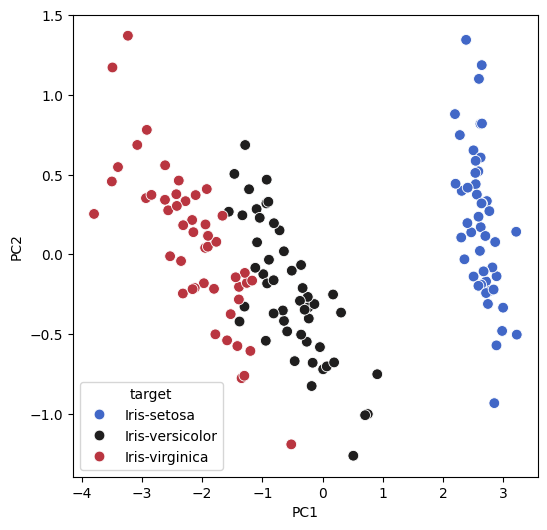

In [ ]:
import seaborn as sb
import matplotlib.pyplot as plt

plt.figure(figsize = (6,6))
sb.scatterplot(data = principal_df , x = 'PC1',y = 'PC2' , hue = 'target' , s = 60 , palette= 'icefire')


## Componentes principales en el círculo

**Teorema.-** Sean $X_{i}$ y $X_{j}$ dos variables aleatorias enteramente explicadas por las dos primeras componentes principales, esto es
$$\rho_{i1}^{2}+ρ_{i2}^2 =1 \ \text{y} \ \rho_{k1}^{2}+ρ_{k2}^2 =1.$$
Entonces,
$$\text{Corr}(X_{i},X_{k})=\rho_{i1}\rho_{k1}+\rho_{i2}\rho_{k2}=\cos(\varphi),$$
donde $φ$ es el ángulo formado por los vectores $(\rho_{i1},\rho_{i2})$ y $(\rho_{k1},\rho_{k2})$.

Por lo tanto, si las variables $X_{i}$ y $X_{k}$ están enteramente explicadaspor las dos primeras componentes principales, el ángulo $φ$ describe la dependencia mutua de tales variables. En efecto, si el $φ=0$, entonces $\text{Corr}(X_{i},X_{j})=1$, esto significa que:
$$∃ \ a>0, \ b\in \mathbb{R} \ \text{tales que} \ \ X_{j}=aX_{k}+b.$$

Similarmente, si $φ=\pi/2$, las variables $X_{i}$ y $X_{k}$ son no correlacionadas.

## PCA a través de **sklearn**: gráfica scree

In [ ]:
import matplotlib.pyplot as plt

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.decomposition import PCA

In [ ]:
import pandas as pd

df = pd.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
    header=None,
    sep=',')

df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
df.dropna(how="all", inplace=True)
df.to_csv("iris_download.csv", index = False)
df.head()

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
X = df.loc[:, 'sepal_len':'petal_wid'].values
y = df.loc[:, 'class'].values

pca = PCA()
X_r = pca.fit(X).transform(X)

In [ ]:
target_names = df.iloc[:,4].unique()
target_names

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

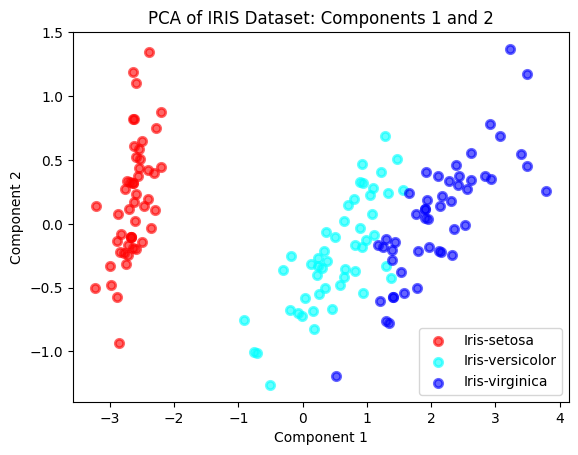

In [ ]:
def pca_scatter(pca1, pca2):
    plt.close
    plt.figure()
    colors = ['red', 'cyan', 'blue']
    lw = 2


    for color, target_name in zip(colors, target_names):
        plt.scatter(X_r[y == target_name, pca1], X_r[y == target_name, pca2], color=color, alpha=.6, lw=lw,
                    label=target_name)
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.title('PCA of IRIS Dataset: Components {} and {}'.format(pca1+1, pca2+1))
    plt.xlabel('Component {}'.format(pca1+1))
    plt.ylabel('Component {}'.format(pca2+1))
    plt.show()

pca_scatter(0, 1)

In [ ]:
X_r = pca.fit(X).transform(X)
print('\nEigenvalores \n%s' %pca.explained_variance_)
print('Eigenvectores \n%s' %pca.components_)


Eigenvalores 
[4.22484077 0.24224357 0.07852391 0.02368303]
Eigenvectores 
[[ 0.36158968 -0.08226889  0.85657211  0.35884393]
 [ 0.65653988  0.72971237 -0.1757674  -0.07470647]
 [-0.58099728  0.59641809  0.07252408  0.54906091]
 [ 0.31725455 -0.32409435 -0.47971899  0.75112056]]


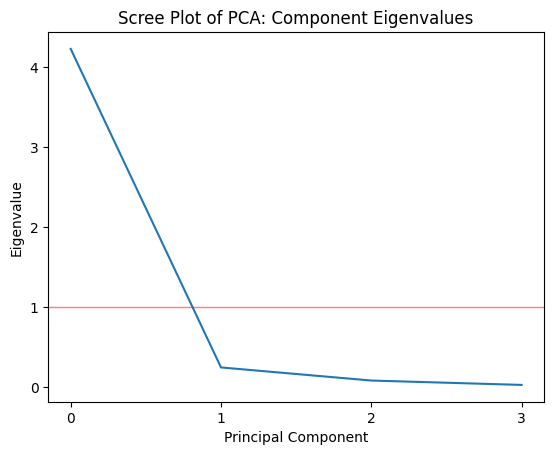

In [ ]:
def scree_plot():
    from matplotlib.pyplot import figure, show
    from matplotlib.ticker import MaxNLocator

    ax = figure().gca()
    ax.plot(pca.explained_variance_)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.xlabel('Principal Component')
    plt.ylabel('Eigenvalue')
    plt.axhline(y=1, linewidth=1, color='r', alpha=0.5)
    plt.title('Scree Plot of PCA: Component Eigenvalues')
    show()

scree_plot()

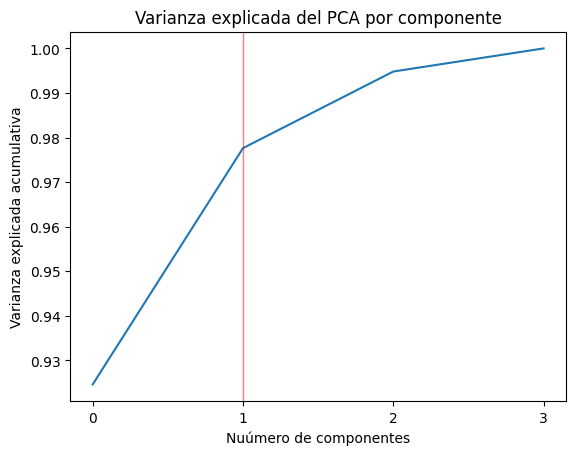

In [ ]:
def var_explicada():
    import numpy as np
    from matplotlib.pyplot import figure, show
    from matplotlib.ticker import MaxNLocator

    ax = figure().gca()
    ax.plot(np.cumsum(pca.explained_variance_ratio_))
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.xlabel('Nuúmero de componentes')
    plt.ylabel('Varianza explicada acumulativa')
    plt.axvline(x=1, linewidth=1, color='r', alpha=0.5)
    plt.title('Varianza explicada del PCA por componente')
    show()

var_explicada()

## Ejercicios

1. Considera los siguientes puntos en $\mathbb{R}^{2}$:
	$$(4,11), \ (8,4), \ (13,5), \ (7,14).$$
Calcula las dos componentes principales y muestra que no están correlacionadas.

In [ ]:
import numpy as np

In [ ]:
X1 = [4, 8, 13, 7]
X2 = [11, 4, 5, 14]

In [ ]:
barX1 = sum(X1) / len(X1)
barX2 = sum(X2) / len(X2)

covX1X2 = sum((a - barX1) * (b - barX2) for (a,b) in zip(X1,X2)) / (len(X1)-1)

In [ ]:
varX1 = np.var(X1, ddof = 1)
varX2 = np.var(X2, ddof = 1)

print(varX1)
print(varX2)

14.0
23.0


In [ ]:
# La matriz de covarianza

S = np.cov(np.array(X1), np.array(X2))

print(S)

[[ 14. -11.]
 [-11.  23.]]


In [ ]:
eigen_val, eigen_vec = np.linalg.eigh(S)

print(eigen_val)
print(eigen_vec)

[ 6.61513568 30.38486432]
[[-0.83025082 -0.55738997]
 [-0.55738997  0.83025082]]


Por lo tanto, la primera componente principal es:
$$\eta_{1}=-0.5573X_{11}+0.8303X_{12}.$$

analicemos la influencia de la componente principal sobre la variable $Xi$.
se tienen las siguientes propiedades:
1. $Cov(Xi,x_{j})$
2. $\rho_{ij}^{2}$=Corr(Xi,j)
3. sumatoria(i=0-p) pgorroi^2=1